# Clustering con Incertidumbre

In [5]:
import pandas
import numpy as np
import statistics as stats

#Imports para calcular círculo a partir de tres puntos
from sympy import Eq
from sympy.geometry import Point, Circle

#Imports para dibujar un circulo
import matplotlib.pyplot as plt

import random as rd

# 1) Estructura de datos:

In [6]:
class Punto(): 
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def print(self):
        print('(',self.x, ', ',self.y,')')
    def __repr__(self):
        return '(%s, %s)' % (self.x,self.y)
    def __str__(self):
        return '(%s, %s)' % (self.x,self.y)

In [7]:
class Cluster(): 
    def __init__(self, x, y, radio):
        self.centro = Punto(x,y)
        self.radio = radio
        
    def print(self):
        print('Centro: ',self.centro, ' Radio: ',self.radio)
    def __repr__(self):
        return 'Centro: %s Radio: %s' % (self.centro,self.radio)
    def __str__(self):
        return 'Centro: %s Radio: %s' % (self.centro,self.radio)

# 2) Estimación:

In [8]:
def get_cluster(puntos): # REF: https://www.geeksforgeeks.org/equation-of-circle-when-three-points-on-the-circle-are-given/
    
    p1 = puntos[0]
    p2 = puntos[1]
    p3 = puntos[2]
    
    circle = Circle(Point(p1.x,p1.y), Point(p2.x,p2.y), Point(p3.x,p3.y))
    
    res = Cluster(float(circle.center.x),float(circle.center.y),float(circle.radius))
    
    return res

In [9]:
def obtener_3_puntos(puntos):
    aux_x_max = 0
    aux_x_min = 0
    aux_y_max = 0

    for i in range(len(puntos)):

        if(puntos[i].x > aux_x_max or i==0):
            px_max = puntos[i]
            aux_x_max = puntos[i].x

        if(puntos[i].x < aux_x_min or i == 0):
            px_min = puntos[i]
            aux_x_min = puntos[i].x   

        if(puntos[i].y > aux_y_max or i == 0):
            py_max = puntos[i]
            aux_y_max = puntos[i].y        
    
    return px_max,px_min,py_max 

In [10]:
def obtener_3_puntos_aleatorio(puntos):
    
    randomVals = rd.sample(puntos,3)
        
    return randomVals[0],randomVals[1],randomVals[2]

El primer ejemplo es un circulo perfecto centrado en el origen y de radio 5.

In [11]:
puntoscsv = pandas.read_csv('Data/puntos_1.csv', header=None, names=['x', 'y']).values
puntos1 = []
for i in range(len(puntoscsv)):
    puntos1.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
puntos1

[(5, 0),
 (4, 3),
 (3, 4),
 (0, 5),
 (-3, 4),
 (-4, 3),
 (-5, 0),
 (-4, -3),
 (-3, -4),
 (0, -5),
 (3, -4),
 (4, -3)]

In [12]:
#Obtenemos 3 puntos lo más alejados posibles
puntos = obtener_3_puntos_aleatorio(puntos1)

cluster = []
cluster.append(get_cluster(puntos))
cluster

[Centro: (0.0, 0.0) Radio: 5.0]

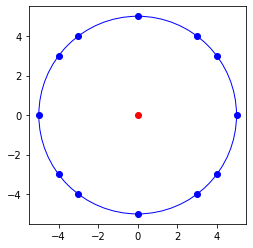

In [225]:
drawCircleAndPoints(puntos1,cluster,'blue')

Lo probamos con una lista de puntos no perfecta y de baricentro "1,0" y radio "4"

In [93]:
puntoscsv = pandas.read_csv('Data/puntos_2.csv', header=None, names=['x', 'y']).values
puntos2 = []
for i in range(len(puntoscsv)):
    puntos2.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
puntos2

[(5.0, 0.0),
 (4.5, 2.0),
 (3.0, 3.5),
 (1.0, 4.0),
 (0.0, 3.75),
 (-2.0, 2.5),
 (-3.0, 0.0),
 (-2.0, -2.5),
 (0.0, -3.75),
 (1.0, -4.0),
 (3.0, -3.5),
 (4.0, -2.5)]

In [94]:
puntos = obtener_3_puntos(puntos2)

cluster = get_cluster(puntos)
cluster

Centro: (1.0, 0.0) Radio: 4.0

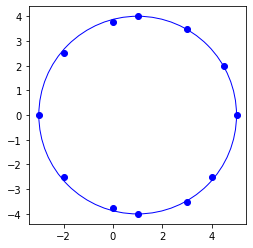

In [95]:
drawCircleAndPoints(puntos2,cluster,'blue')

In [96]:
puntoscsv = pandas.read_csv('Data/puntos_3.csv', header=None, names=['x', 'y']).values
puntos3 = []
for i in range(len(puntoscsv)):
    puntos3.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
puntos3

[(13.0, 10.0),
 (12.0, 12.5),
 (11.0, 13.0),
 (10.0, 13.0),
 (9.0, 12.75),
 (8.0, 12.0),
 (7.0, 10.0),
 (8.0, 7.5),
 (9.0, 7.2)]

In [97]:
puntos = obtener_3_puntos(puntos3)

cluster = get_cluster(puntos)
cluster

Centro: (10.0, 10.166666666666666) Radio: 3.0046260628866577

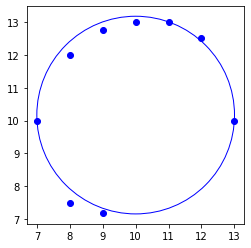

In [98]:
drawCircleAndPoints(puntos3,cluster,'blue')

# 3) Grados de pertenencia

In [99]:
def grados_pertenencia(p,clusters):
    
    #Calculamos la distancia de el punto a cada cluster
    distancias = []
    
    for i in range(len(clusters)):
        d = np.sqrt(pow(p.x - clusters[i].centro.x,2) + pow(p.y - clusters[i].centro.y,2))
        distancias.append(abs(d-clusters[i].radio))
    
    #Calculamos el grado de pertencia a cada cluster
    pertenencias = []
    
    for i in range(len(clusters)):
        if(distancias[i]==0.0):
            per = 100.0
        else:
            per = 100/(pow(distancias[i],2))
        pertenencias.append(per)
        
    #Normalizamos
    suma = sum(pertenencias)
    pertenencias = np.divide(pertenencias,suma)
    
    return pertenencias

In [100]:
#Clusters:
cluster1 = Cluster(0,0,5)
cluster2 = Cluster(1,0,4)
cluster3 = Cluster(10,10,3)

clusters = [cluster1,cluster2,cluster3]

In [101]:
p = Punto(2,0)
print(grados_pertenencia(p,clusters))

[0.47764808 0.47764808 0.04470383]


In [102]:
p = Punto(10,8)
print(grados_pertenencia(p,clusters))
print(sum(grados_pertenencia(p,clusters)))

[0.01590335 0.01498611 0.96911054]
1.0


In [103]:
p = Punto(-10,0)
print(grados_pertenencia(p,clusters))

[0.63415565 0.3235488  0.04229555]


In [104]:
clusters = [cluster1,cluster3]
p = Punto(2,0)
print(grados_pertenencia(p,clusters))

[0.91441817 0.08558183]


# 4) Modificacion 2

In [266]:
def clusters_iniciales(puntos,n_clusters):
    
    px_max, px_min, py_max = obtener_3_puntos(puntos)
    x_max = px_max.x
    x_min = px_min.x
    y_max = py_max.y
    rang = abs(x_max-x_min)/n_clusters
    
    clusters = []
    
    for i in range(n_clusters):
        cluster = Cluster(x_min + i*rang ,y_max/2, 5)
        clusters.append(cluster)
    
    return clusters
    

In [273]:
def clusters_iniciales_aleatorio(puntos,n_clusters):
    
    px_max, px_min, py_max = obtener_3_puntos_aleatorio(puntos)
    clusters = []
    
    for i in range(n_clusters):
        cluster = Cluster(px_max.x,px_min.y, 5)
        clusters.append(cluster)
    
    return clusters
    

In [118]:
#Le pasamos los 3 puntos con mayor grado de pertenencia a un cluster:
def puntos_mayor_grado_por_cluster(puntos,cluster,n_cluster):
    per = []
    res = []

    for i in range(len(puntos)):
        per.append(grados_pertenencia(puntos[i],cluster)[n_cluster])
    
    res.append(puntos[per.index(max(per))])
    puntos = np.delete(puntos,per.index(max(per)),0)
    per.remove(max(per))
    
    res.append(puntos[per.index(max(per))])
    puntos = np.delete(puntos,per.index(max(per)),0)
    per.remove(max(per))
    
    res.append(puntos[per.index(max(per))])
    
    return res


In [119]:
def get_real_clusters(puntos,clusters):
    res = []
    
    for i in range(len(clusters)):
        pts_pertenencia = puntos_mayor_grado_por_cluster(puntos,clusters,i)
        res.append(get_cluster(pts_pertenencia))
        
    return res 

In [120]:
#Clusters iniciales:
cluster1 = Cluster(1,1,4)
cluster2 = Cluster(7,7,2)

clusters = [cluster1,cluster2]

#Todos los puntos:
puntoscsv = pandas.read_csv('Data/puntos_1_y_3.csv', header=None, names=['x', 'y']).values
puntos = []
for i in range(len(puntoscsv)):
    puntos.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
puntos

print(cluster1)
print(cluster2)

Centro: (1, 1) Radio: 4
Centro: (7, 7) Radio: 2


In [190]:
def iterar_get_real_cluster(puntos,prev_clusters,razon, max_iteraciones, imprimir):
    #raiz suma cuadrados centro y el radio
    #imprimir datos de como está funcionando el método
    iterar = 1
    iteraciones = 0;
    while(iterar and iteraciones <= max_iteraciones):
        iteraciones = iteraciones + 1
        nuevo_factor = []
        next_clusters = get_real_clusters(puntos,prev_clusters)
        if(imprimir):
            print(next_clusters)
        for i in range(len(prev_clusters)):
            nuevo_factor.append(np.sqrt((prev_clusters[i].centro.x - next_clusters[i].centro.x)**2 + (prev_clusters[i].centro.y - next_clusters[i].centro.y)**2) + abs(prev_clusters[i].radio - next_clusters[i].radio))
            if(imprimir):
                print(nuevo_factor)
        if(max(nuevo_factor) < razon):    
            iterar = 0
        prev_clusters = next_clusters
    return next_clusters

In [134]:
#Clusters iniciales:
cluster1 = Cluster(-2,-5,2)
cluster2 = Cluster(-8,-2,10)

clusters = [cluster1,cluster2]

#Todos los puntos:
puntoscsv = pandas.read_csv('Data/puntos_1_y_3.csv', header=None, names=['x', 'y']).values
puntos = []
for i in range(len(puntoscsv)):
    puntos.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
puntos

print(cluster1)
print(cluster2)

Centro: (-2, -5) Radio: 2
Centro: (-8, -2) Radio: 10


In [135]:
cluster = iterar_get_real_cluster(puntos,clusters,0.000002,1)
cluster

[Centro: (0.0, 0.0) Radio: 5.0, Centro: (0.0, 0.0) Radio: 5.0]
[8.385164807134505]
[8.385164807134505, 13.246211251235321]
[Centro: (0.0, 0.0) Radio: 5.0, Centro: (0.0, 0.0) Radio: 5.0]
[0.0]
[0.0, 0.0]


[Centro: (0.0, 0.0) Radio: 5.0, Centro: (0.0, 0.0) Radio: 5.0]

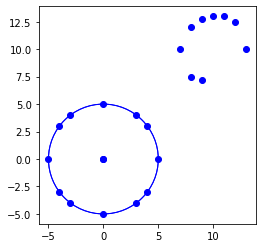

In [136]:
drawCircleAndPoints(puntos,cluster,'blue')

In [161]:
#Agustin 1:

#Clusters iniciales:
cluster1 = Cluster(-2,-5,2)
cluster2 = Cluster(-8,-2,10)

clusters = [cluster1,cluster2]

#Todos los puntos:
puntoscsv = pandas.read_csv('Data/puntos_agustin_1.csv', header=None, names=['x', 'y']).values
puntos = []
for i in range(len(puntoscsv)):
    puntos.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
puntos

print(cluster1)
print(cluster2)

Centro: (-2, -5) Radio: 2
Centro: (-8, -2) Radio: 10


In [162]:
clusters = iterar_get_real_cluster(puntos,clusters,0.000002,0)
clusters

[Centro: (9.042857142857143, 5.0) Radio: 1.957142857142857,
 Centro: (1.9973684210526317, 2.0078947368421054) Radio: 0.9973996662235383]

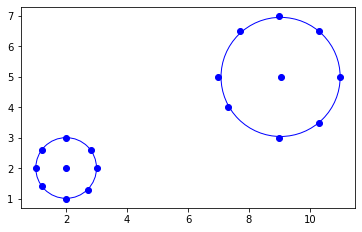

In [163]:
drawCircleAndPoints(puntos,clusters,'blue')

[Centro: (1.0, 3.5) Radio: 5, Centro: (6.0, 3.5) Radio: 5]

In [232]:
#Agustin 1+:

#Todos los puntos:
puntoscsv = pandas.read_csv('Data/puntos_agustin_1.csv', header=None, names=['x', 'y']).values
puntos = []
for i in range(len(puntoscsv)):
    puntos.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
puntos

#Clusters iniciales:
clusters = clusters_iniciales(puntos,2)

print(clusters[0])
print(clusters[1])

Centro: (7.0, 1.75) Radio: 5
Centro: (9.9, 1.75) Radio: 5


In [233]:
clusters = iterar_get_real_cluster(puntos,clusters,0.0002,100,0)
clusters

[Centro: (1.9973684210526317, 2.0078947368421054) Radio: 0.9973996662235383,
 Centro: (8.957692307692307, 5.042307692307692) Radio: 1.9581494101385715]

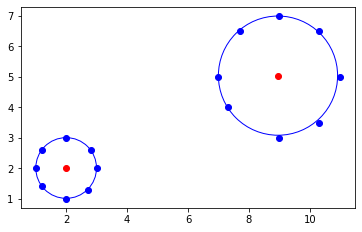

In [234]:
drawCircleAndPoints(puntos,clusters,'blue')

In [235]:
#Agustin 2:

#Clusters iniciales:
cluster1 = Cluster(0,0,2)
cluster2 = Cluster(10,10,10)
cluster3 = Cluster(-5,-8,6)

clusters = [cluster1,cluster2,cluster3]

#Todos los puntos:
puntoscsv = pandas.read_csv('Data/puntos_agustin_2.csv', header=None, names=['x', 'y']).values
puntos = []
for i in range(len(puntoscsv)):
    puntos.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
puntos

print(cluster1)
print(cluster2)
print(cluster3)

Centro: (0, 0) Radio: 2
Centro: (10, 10) Radio: 10
Centro: (-5, -8) Radio: 6


In [149]:
clusters = iterar_get_real_cluster(puntos,clusters,0.002,0)
clusters

[Centro: (9.413358778625954, 4.918702290076336) Radio: 3.3904099129247847,
 Centro: (20.1053706505295, 18.10370650529501) Radio: 6.104615964724857,
 Centro: (7.816666666666666, 0.55) Radio: 7.543392988422237]

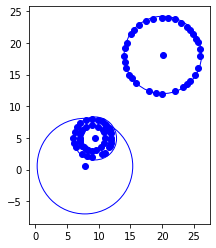

In [150]:
drawCircleAndPoints(puntos,clusters,'blue')

In [280]:
#Agustin 2+:

#Todos los puntos:
puntoscsv = pandas.read_csv('Data/puntos_agustin_2.csv', header=None, names=['x', 'y']).values
puntos = []
for i in range(len(puntoscsv)):
    puntos.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
puntos

#Clusters iniciales:
clusters = clusters_iniciales(puntos,3)

print(clusters[0])
print(clusters[1])
print(clusters[2])

Centro: (6.0, 12.0) Radio: 5
Centro: (12.666666666666668, 12.0) Radio: 5
Centro: (19.333333333333336, 12.0) Radio: 5


In [283]:
clusters = iterar_get_real_cluster(puntos,clusters,0.02,100,0)
clusters

[Centro: (9.633333333333333, 4.783333333333333) Radio: 3.6425342216039036,
 Centro: (9.635714285714286, 6.007142857142857) Radio: 1.8122316831656453,
 Centro: (19.957291666666666, 17.144166666666667) Radio: 5.442742081235084]

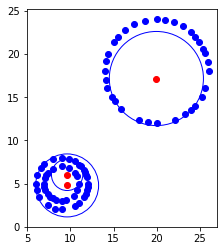

In [284]:
drawCircleAndPoints(puntos,clusters,'blue')

# UTILS

In [196]:
def drawCircleAndPoints(Puntos, Clusters, color):  # learningaboutelectronics.com/Articles/How-to-draw-a-circle-using-matplotlib-in-Python.php
    
    Xs = []
    Ys = []
    for p in Puntos:
        Xs.append(p.x)
        Ys.append(p.y)
    plt.plot(Xs, Ys, 'ro', color=color)
    
    for cluster in Clusters:
        plt.plot(cluster.centro.x,cluster.centro.y, 'ro', color='red')
        circle = plt.Circle((cluster.centro.x, cluster.centro.y), cluster.radio, color=color, fill=False)
        ax=plt.gca()
        ax.add_patch(circle)
        plt.axis('scaled')
    
    plt.show()